# BPASS SPECTRA ANALYSIS

In [4]:
import galspec as gs
import pandas as pd
import matplotlib.pyplot as plt


Available
- $Z$ : 0.00001, 0.0001, 0.001, 0.002, 0.003, 0.004, 0.006, 0.008, 0.010, 0.020, 0.030, 0.040
- $\lambda$ : $1\AA$ to $100,000\AA$
- $\log Age$ : 6 to 11 in steps of 0.1

### Compare single system vs binary system

Text(0.5, 1.0, 'Log Age :8.0')

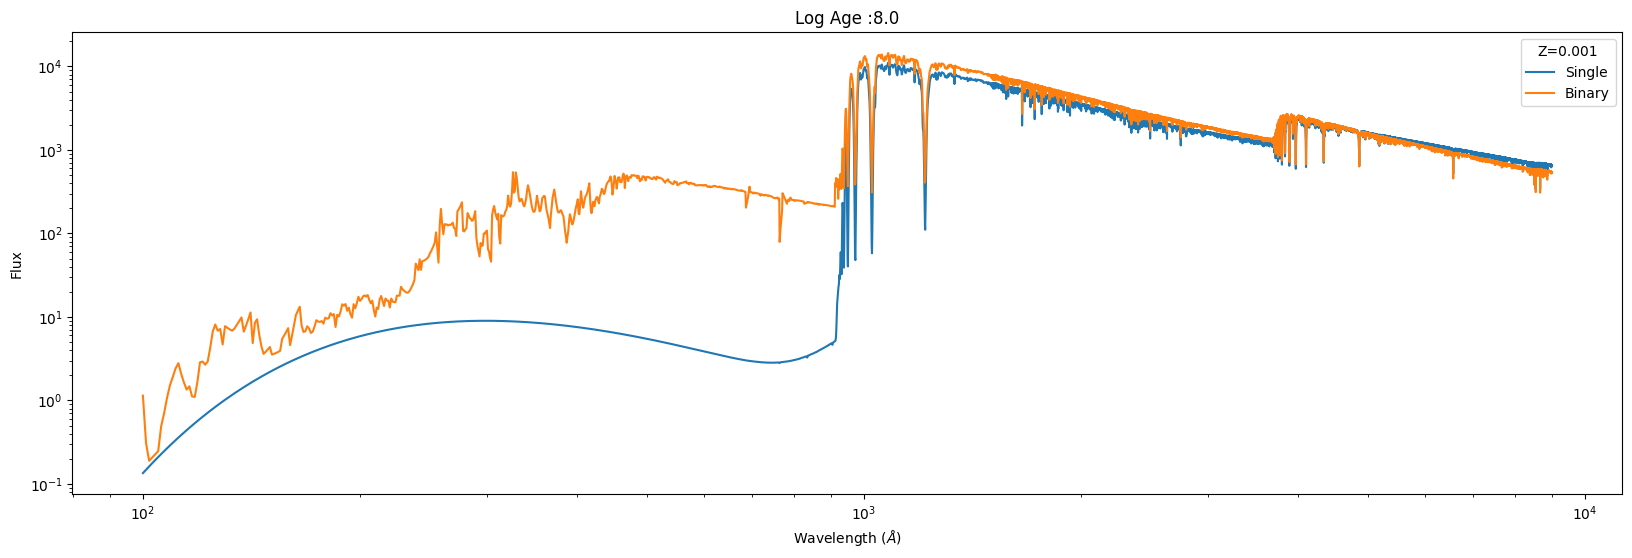

In [5]:
Z = 0.001
lam = [100,9000]
Age = 8.0
# -----
sin = gs.BPASS("KROUPA_UPTO_300M","Single",Z)
bin = gs.BPASS("KROUPA_UPTO_300M","Binary",Z)
# -----
plt.figure(figsize=(20,6))
fsin=sin.Spectra.GetFlux(lam[0],lam[-1])
fbin=bin.Spectra.GetFlux(lam[0],lam[-1])
plt.plot(fsin.WL,fsin[str(Age)],label="Single")
plt.plot(fbin.WL,fbin[str(Age)],label="Binary")
plt.xlabel("Wavelength ($\AA$)")
plt.ylabel("Flux")
plt.legend(title=f"Z={Z}")
plt.yscale('log')
plt.xscale('log')
plt.title(f"Log Age :{Age}")

### Compare Evolution of single and binary systems

Text(0.5, 1.0, 'Binary System')

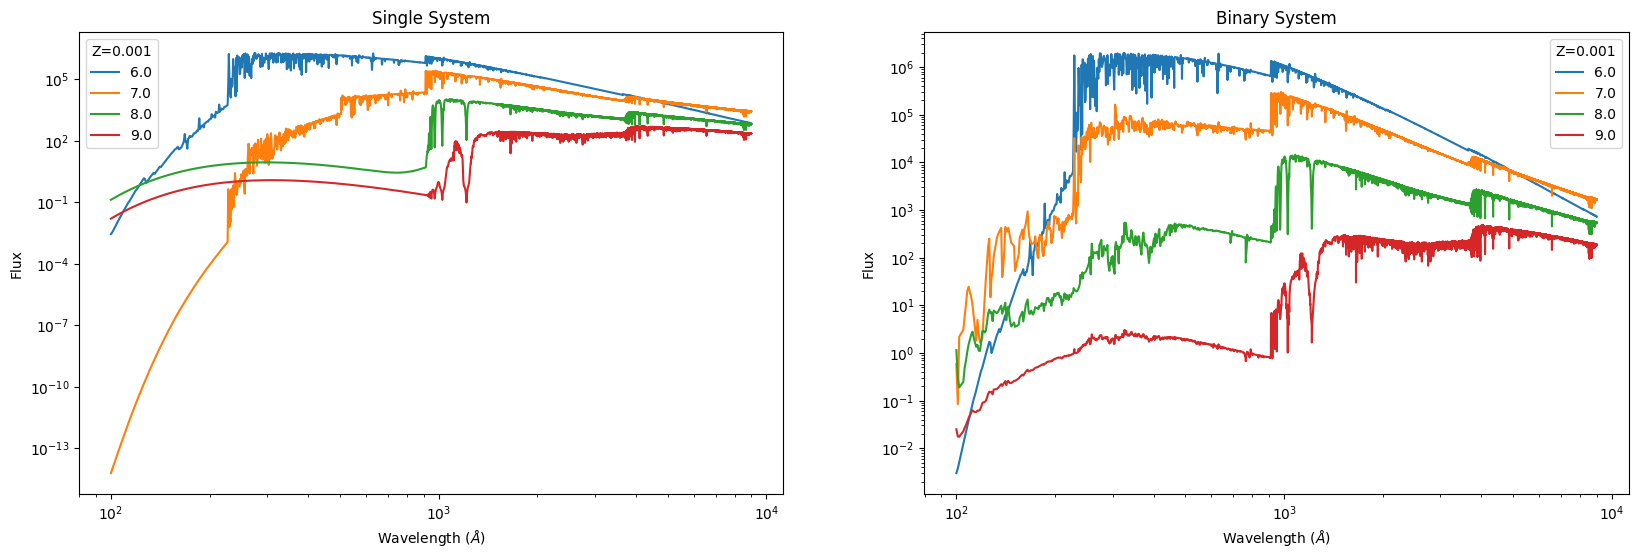

In [6]:
Z = 0.001
lam = [100,9000]
# -----
sin = gs.BPASS("KROUPA_UPTO_300M","Single",Z)
bin = gs.BPASS("KROUPA_UPTO_300M","Binary",Z)
# -----
fsin=sin.Spectra.GetFlux(lam[0],lam[-1])
fbin=bin.Spectra.GetFlux(lam[0],lam[-1])

fig,ax=plt.subplots(1,2,figsize=(20,6))

for age in ['6.0','7.0','8.0','9.0']:
    ax[0].plot(fsin.WL,fsin[str(age)],label=age)
    ax[1].plot(fbin.WL,fbin[str(age)],label=age)

for axi in ax:
    axi.set_xlabel("Wavelength ($\AA$)")
    axi.set_ylabel("Flux")
    axi.legend(title=f"Z={Z}")
    axi.set_yscale('log')
    axi.set_xscale('log')

ax[0].set_title("Single System")
ax[1].set_title("Binary System")

### Compare IMF Effect

Text(0.5, 1.0, 'Binary System (500 Myr)')

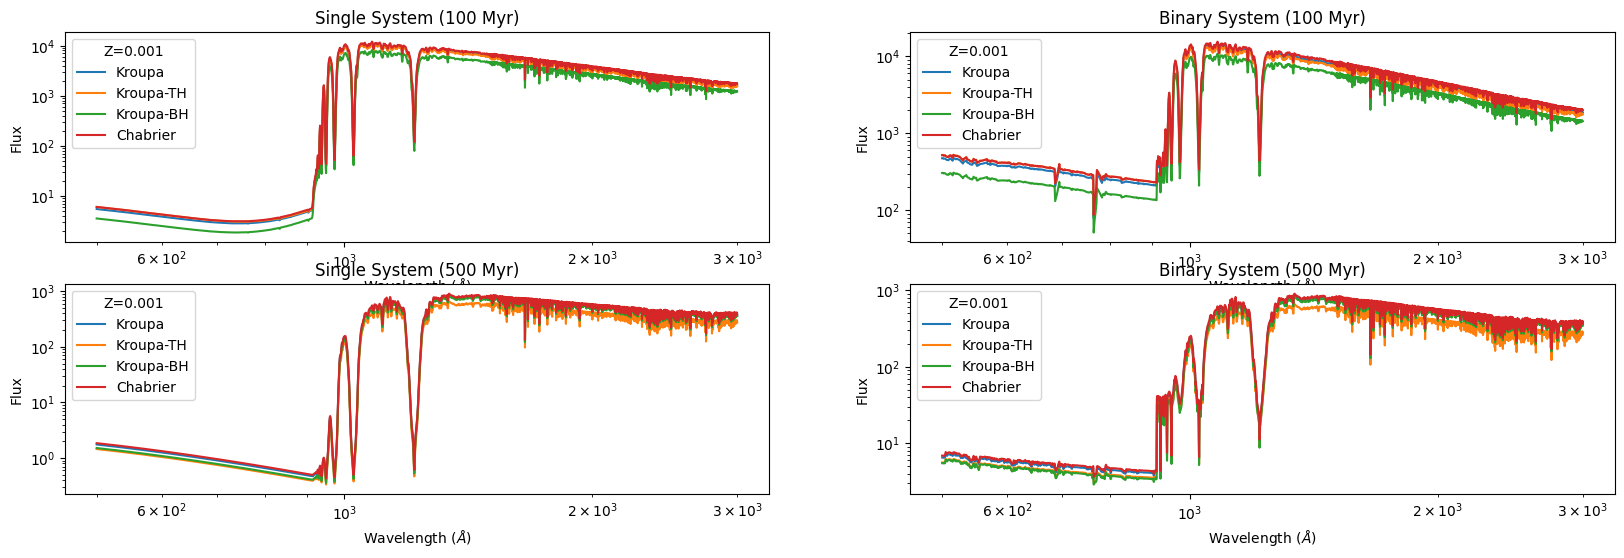

In [8]:
Z = 0.001
lam = [500,3000]
# -----
ksin = gs.BPASS("KROUPA_UPTO_300M","Single",Z)
ktsin = gs.BPASS("KROUPA_UPTO_300M_TOP_HEAVY","Single",Z)
kbsin = gs.BPASS("KROUPA_UPTO_300M_BOTTOM_HEAVY","Single",Z)
csin = gs.BPASS("CHABRIER_UPTO_300M","Single",Z)

kbin = gs.BPASS("KROUPA_UPTO_300M","Binary",Z)
ktbin = gs.BPASS("KROUPA_UPTO_300M_TOP_HEAVY","Binary",Z)
kbbin = gs.BPASS("KROUPA_UPTO_300M_BOTTOM_HEAVY","Binary",Z)
cbin = gs.BPASS("CHABRIER_UPTO_300M","Binary",Z)

labels = ["Kroupa","Kroupa-TH","Kroupa-BH","Chabrier"]

fig,ax=plt.subplots(2,2,figsize=(20,6))

for i,mod in enumerate([ksin,ktsin,kbsin,csin]):
    fmod=mod.Spectra.GetFlux(lam[0],lam[-1])
    ax[0,0].plot(fmod.WL,fmod['8.0'],label=labels[i])
    ax[1,0].plot(fmod.WL,fmod['8.7'],label=labels[i])

for i,mod in enumerate([kbin,ktbin,kbbin,cbin]):
    fmod=mod.Spectra.GetFlux(lam[0],lam[-1])
    ax[0,1].plot(fmod.WL,fmod['8.0'],label=labels[i])
    ax[1,1].plot(fmod.WL,fmod['8.7'],label=labels[i])

for axi in ax.flatten():
    axi.set_xlabel("Wavelength ($\AA$)")
    axi.set_ylabel("Flux")
    axi.legend(title=f"Z={Z}")
    axi.set_yscale('log')
    axi.set_xscale('log')

ax[0,0].set_title("Single System (100 Myr)")
ax[0,1].set_title("Binary System (100 Myr)")
ax[1,0].set_title("Single System (500 Myr)")
ax[1,1].set_title("Binary System (500 Myr)")
